# C) EDA🔍
1) Descriptive stats table for key features.

2) Correlation analysis; identify strongest relations with G3.

3) Group comparisons (e.g., studytime, failures, schoolsup) vs outcomes.

4) 3–5 testable hypotheses stated and addressed.

In [19]:
# Imports & Config
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy import stats

# Load config
with open("../artifacts/active_dataset.json", "r") as f:
    config = json.load(f)

active_dataset_name = config["active_dataset"]
processed_path = config["processed_path"]

# Load processed dataset
df = pd.read_csv(processed_path)

print(f"Loaded dataset: {active_dataset_name}")
print("Shape:", df.shape)

df.head()


Loaded dataset: merged
Shape: (1044, 42)


,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5,3,3,1,1,3,4,5,5,6
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,3,2,2,3,3,10,7,8,10
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3,2,2,1,1,5,2,15,14,15
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,3,2,1,2,5,4,6,10,10


Descriptive Statistics for Numeric Features:


,count,mean,std,min,25%,50%,75%,max
school_MS,1044.0,0.260536,0.439138,0.0,0.0,0.0,1.0,1.0
sex_M,1044.0,0.433908,0.495850,0.0,0.0,0.0,1.0,1.0
address_U,1044.0,0.727011,0.445708,0.0,0.0,1.0,1.0,1.0
famsize_LE3,1044.0,0.293103,0.455404,0.0,0.0,0.0,1.0,1.0
Pstatus_T,1044.0,0.884100,0.320259,0.0,1.0,1.0,1.0,1.0
Mjob_health,1044.0,0.078544,0.269155,0.0,0.0,0.0,0.0,1.0
Mjob_other,1044.0,0.382184,0.486154,0.0,0.0,0.0,1.0,1.0
Mjob_services,1044.0,0.228927,0.420344,0.0,0.0,0.0,0.0,1.0
Mjob_teacher,1044.0,0.124521,0.330333,0.0,0.0,0.0,0.0,1.0
Fjob_health,1044.0,0.039272,0.194335,0.0,0.0,0.0,0.0,1.0


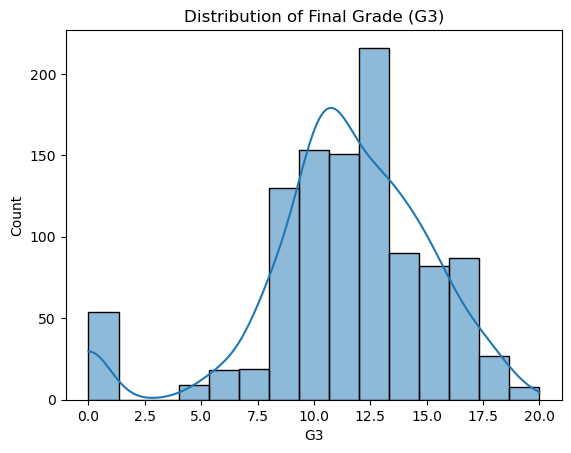

In [8]:
# Descriptive Statistics
# Summary for numeric features
desc_stats = df.describe().T

print("Descriptive Statistics for Numeric Features:")
display(desc_stats)

# Distribution of target (G3)
sns.histplot(df["G3"], bins=15, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.show()


Correlation of features with G3:


G3                   1.000000
G2                   0.910743
G1                   0.809142
higher_yes           0.236578
Medu                 0.201472
studytime            0.161629
Fedu                 0.159796
reason_reputation    0.121303
address_U            0.117696
internet_yes         0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
Mjob_teacher         0.084521
famsize_LE3          0.061209
famrel               0.054461
Mjob_services        0.045015
Fjob_health          0.042101
nursery_yes          0.039950
activities_yes       0.033998
famsup_yes           0.013313
guardian_mother      0.009746
reason_home          0.003895
Fjob_other          -0.023825
Pstatus_T           -0.030693
sex_M               -0.031472
Fjob_services       -0.035273
reason_other        -0.043097
absences            -0.045671
paid_yes            -0.049388
freetime            -0.064890
Mjob_other          -0.066051
schoolsup_yes       -0.079346
health              -0.080079
guardian_o

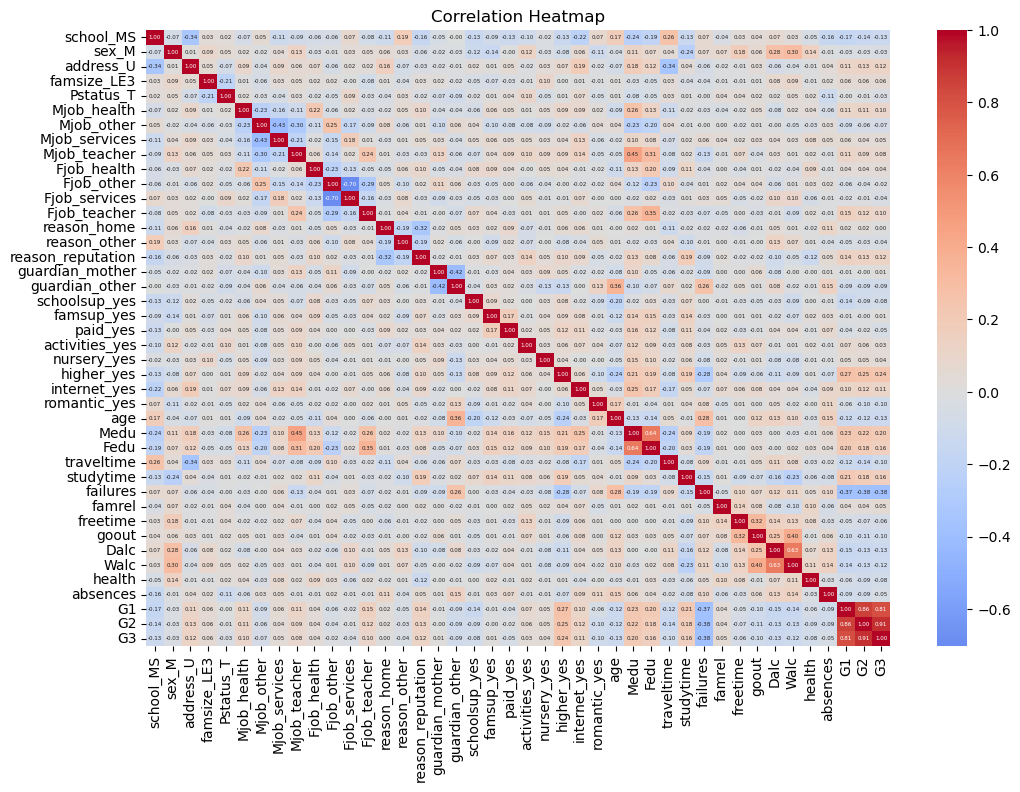

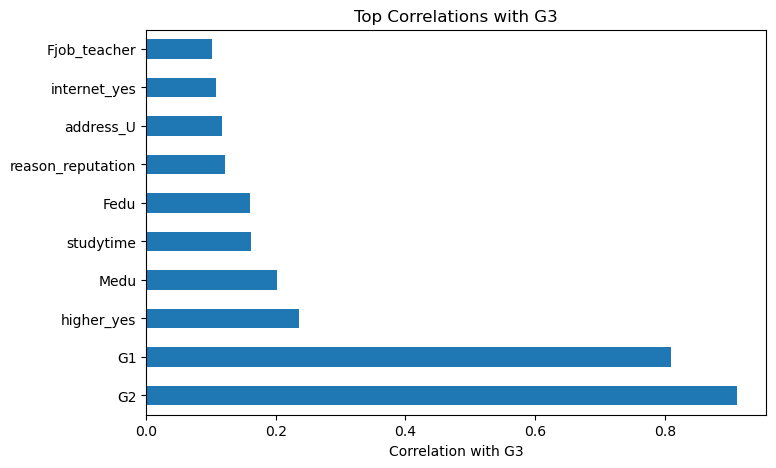

In [17]:
# Correlation Analysis (with smaller annotations)

# Convert boolean columns to int for correlation
df_numeric = df.copy()
df_numeric = df_numeric.apply(lambda x: x.astype(int) if x.dtype == "bool" else x)

# Correlation matrix
corr = df_numeric.corr(numeric_only=True)

# Focus on correlation with target G3
g3_corr = corr["G3"].sort_values(ascending=False)

print("Correlation of features with G3:")
display(g3_corr)

# Heatmap visualization with smaller numbers
plt.figure(figsize=(12,8))
sns.heatmap(
    corr, 
    cmap="coolwarm", 
    center=0, 
    annot=True, 
    fmt=".2f", 
    annot_kws={"size":4}  
)
plt.title("Correlation Heatmap")
plt.show()

# Barplot for top correlations with G3
top_corr = g3_corr.drop("G3").head(10)
top_corr.plot(kind="barh", figsize=(8,5))
plt.title("Top Correlations with G3")
plt.xlabel("Correlation with G3")
plt.show()


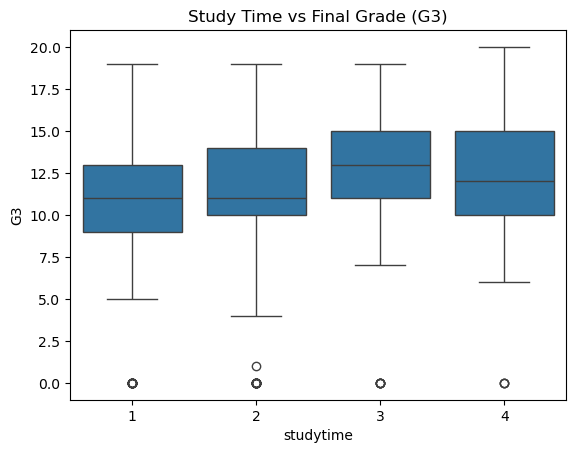

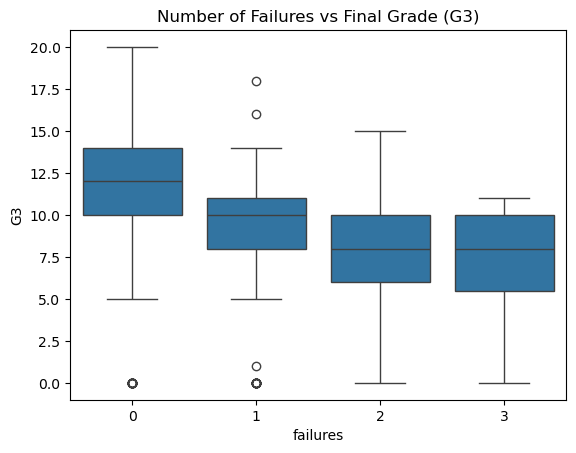

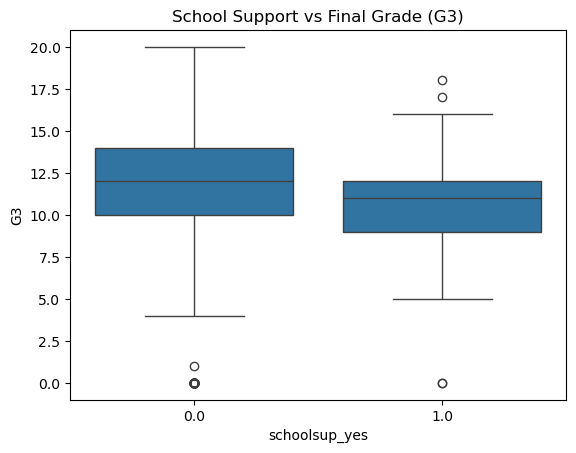

In [12]:
# Group Comparisons
# Example 1: Studytime vs G3
sns.boxplot(x="studytime", y="G3", data=df)
plt.title("Study Time vs Final Grade (G3)")
plt.show()

# Example 2: Failures vs G3
sns.boxplot(x="failures", y="G3", data=df)
plt.title("Number of Failures vs Final Grade (G3)")
plt.show()

# Example 3: School Support vs G3
sns.boxplot(x="schoolsup_yes", y="G3", data=df)
plt.title("School Support vs Final Grade (G3)")
plt.show()


### Hypotheses
- H1: Students with higher study time achieve higher final grades.
- H2: Students with more failures have lower final grades.
- H3: Students receiving school support have higher final grades.
- H4: Higher absences negatively impact final grades.


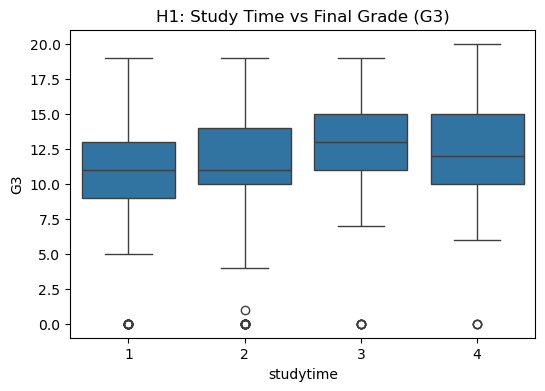

Mean G3 by Study Time:


studytime
1    10.580442
2    11.335984
3    12.493827
4    12.274194
Name: G3, dtype: float64

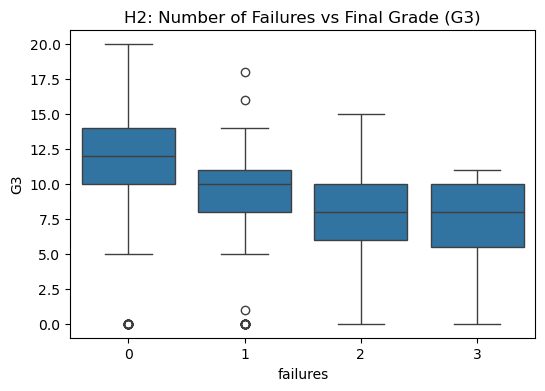


Mean G3 by Number of Failures:


failures
0    12.054588
1     8.425000
2     7.484848
3     6.800000
Name: G3, dtype: float64

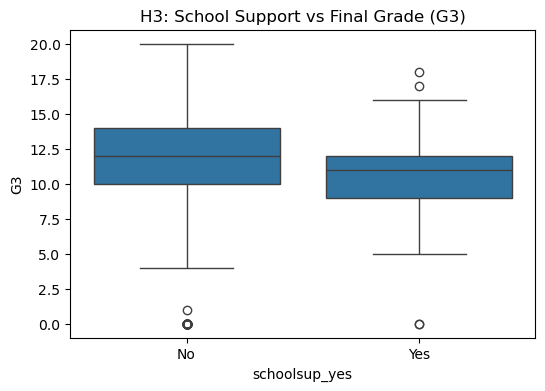


Mean G3 by School Support:


schoolsup_yes
0.0    11.451892
1.0    10.487395
Name: G3, dtype: float64

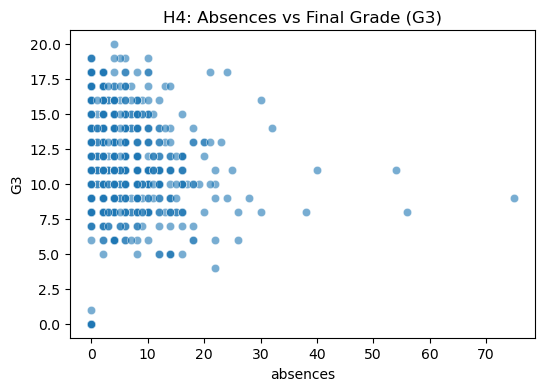


Correlation between Absences and G3:
-0.045670576988373665


In [18]:
# Hypotheses Testing with Visualizations

# H1: Study time vs G3
plt.figure(figsize=(6,4))
sns.boxplot(x="studytime", y="G3", data=df)
plt.title("H1: Study Time vs Final Grade (G3)")
plt.show()

print("Mean G3 by Study Time:")
display(df.groupby("studytime")["G3"].mean())


# H2: Failures vs G3
plt.figure(figsize=(6,4))
sns.boxplot(x="failures", y="G3", data=df)
plt.title("H2: Number of Failures vs Final Grade (G3)")
plt.show()

print("\nMean G3 by Number of Failures:")
display(df.groupby("failures")["G3"].mean())


# H3: School support vs G3
plt.figure(figsize=(6,4))
sns.boxplot(x="schoolsup_yes", y="G3", data=df)
plt.title("H3: School Support vs Final Grade (G3)")
plt.xticks([0,1], ["No","Yes"])
plt.show()

print("\nMean G3 by School Support:")
display(df.groupby("schoolsup_yes")["G3"].mean())


# H4: Absences vs G3
plt.figure(figsize=(6,4))
sns.scatterplot(x="absences", y="G3", data=df, alpha=0.6)
plt.title("H4: Absences vs Final Grade (G3)")
plt.show()

print("\nCorrelation between Absences and G3:")
print(df["absences"].corr(df["G3"]))


# D) Visualization 📊📈
1) Minimum required figures (labeled and readable):

- Histograms of 3+ numeric variables.

- Boxplot/violin of G3 across studytime or schoolsup.

- Scatter (e.g., absences vs G3) with interpretation.

- Correlation heatmap of numeric features.

In [22]:
sns.set(style="whitegrid")

# load config
with open("../artifacts/active_dataset.json", "r") as f:
    config = json.load(f)

clean_path = config.get("clean_path", config.get("processed_path"))
processed_path = config.get("processed_path", clean_path)

# load datasets
clean_df = pd.read_csv(clean_path)
proc_df = pd.read_csv(processed_path)

print("Loaded clean DF:", clean_path, "shape:", clean_df.shape)
print("Loaded processed DF:", processed_path, "shape:", proc_df.shape)

# figures output folder
fig_dir = "../artifacts/figures"
os.makedirs(fig_dir, exist_ok=True)


Loaded clean DF: ../artifacts/merged-clean.csv shape: (1044, 33)
Loaded processed DF: ../artifacts/merged-processed.csv shape: (1044, 42)


Histogram variables: ['G3', 'absences', 'studytime', 'age', 'G1', 'G2', 'failures']


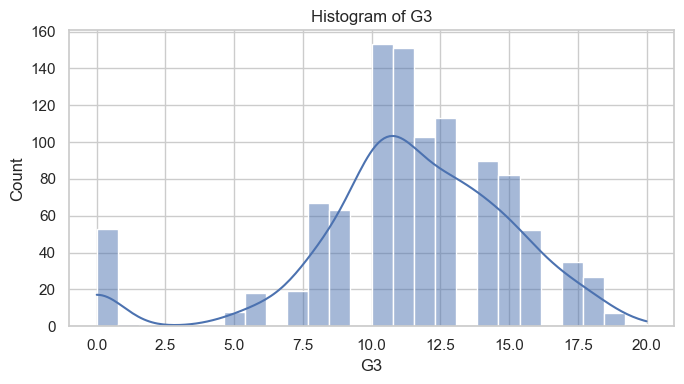

Saved: ../artifacts/figures\hist_G3.png


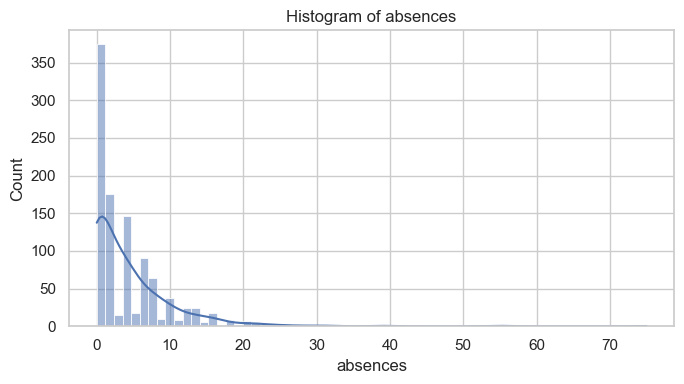

Saved: ../artifacts/figures\hist_absences.png


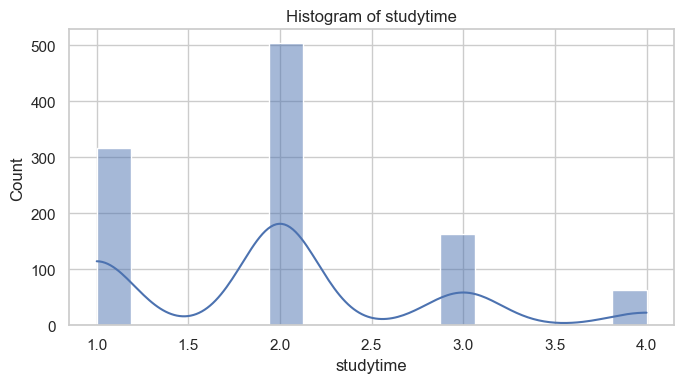

Saved: ../artifacts/figures\hist_studytime.png


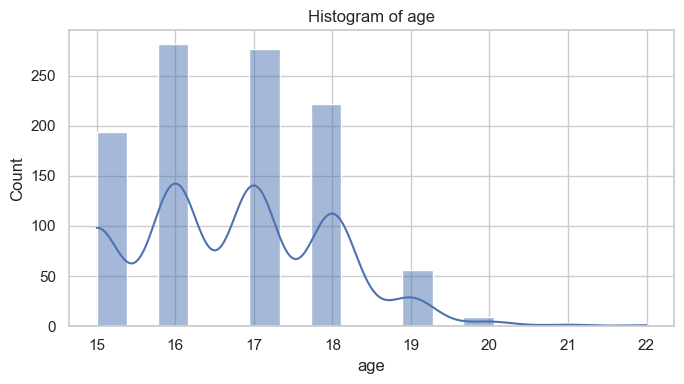

Saved: ../artifacts/figures\hist_age.png


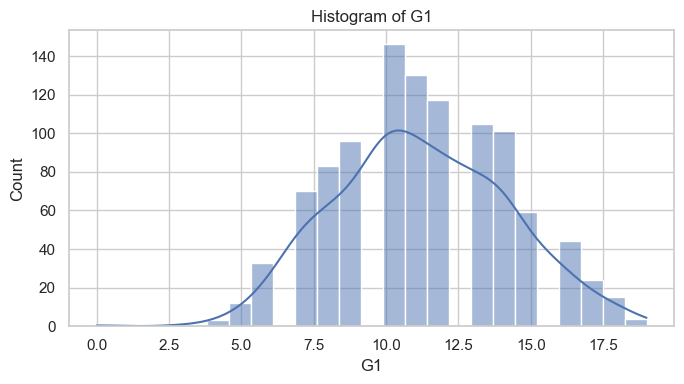

Saved: ../artifacts/figures\hist_G1.png


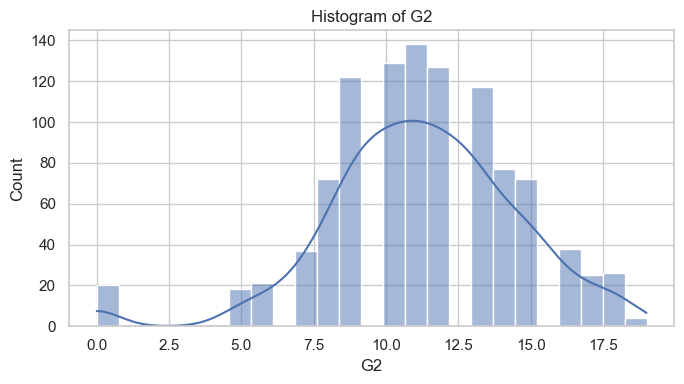

Saved: ../artifacts/figures\hist_G2.png


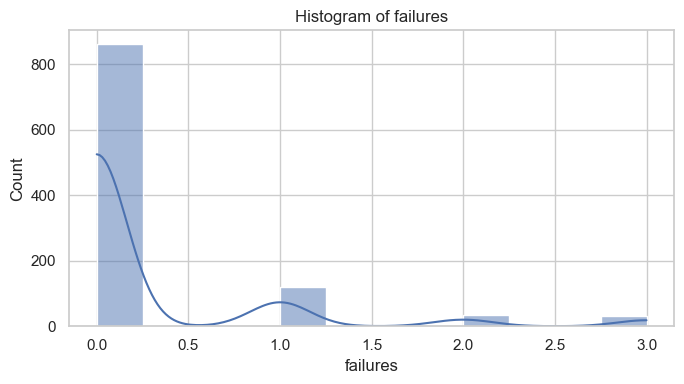

Saved: ../artifacts/figures\hist_failures.png


In [23]:
# Histograms of 3+ numeric variables
candidates = ["G3", "absences", "studytime", "age", "G1", "G2", "failures"]
numeric_vars = [c for c in candidates if c in clean_df.columns]

# ensure at least 3 variables
if len(numeric_vars) < 3:
    # fallback: take first 3 numeric columns from clean_df
    numeric_cols_all = clean_df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_vars = numeric_cols_all[:3]

print("Histogram variables:", numeric_vars)

for var in numeric_vars:
    plt.figure(figsize=(7,4))
    sns.histplot(clean_df[var].dropna(), kde=True)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.tight_layout()
    path = os.path.join(fig_dir, f"hist_{var}.png")
    plt.savefig(path, dpi=150)
    plt.show()
    print("Saved:", path)


### Interpretation – Histograms
- **Age**: Most students are between 15 and 18 years old, which is expected for this school stage.  
- **Absences**: The distribution is right-skewed; most students have low absences (<20), but there are a few outliers with very high absences.  
- **G3 (Final Grade)**: The distribution is approximately normal but slightly skewed, with most students scoring below 15.


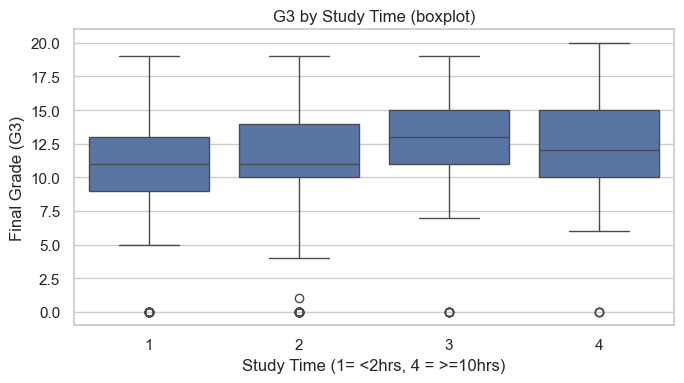

Saved: ../artifacts/figures\boxplot_G3_by_studytime.png


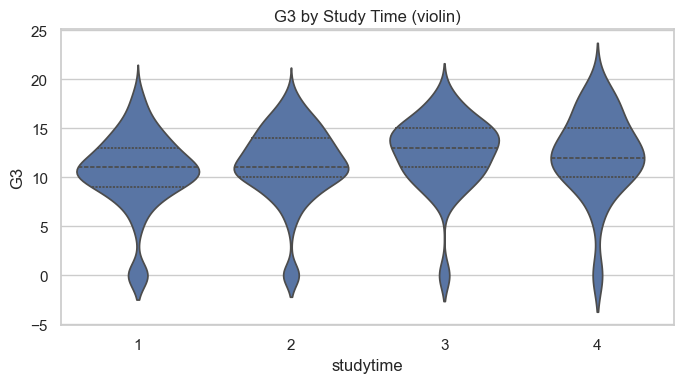

Saved: ../artifacts/figures\violin_G3_by_studytime.png


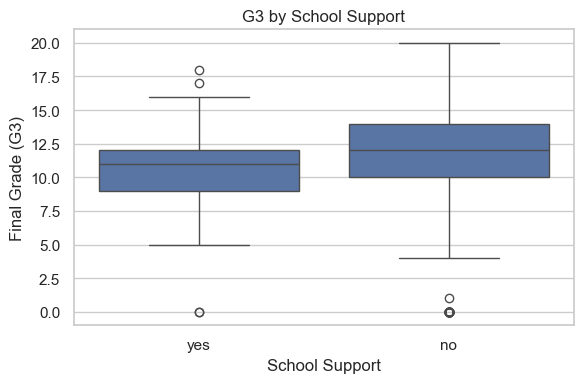

Saved: ../artifacts/figures\boxplot_G3_by_schoolsup.png


In [24]:
# Boxplot / Violin plots

# 1) studytime (categorical 1..4)
if "studytime" in clean_df.columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(x="studytime", y="G3", data=clean_df)
    plt.title("G3 by Study Time (boxplot)")
    plt.xlabel("Study Time (1= <2hrs, 4 = >=10hrs)")
    plt.ylabel("Final Grade (G3)")
    plt.tight_layout()
    p = os.path.join(fig_dir, "boxplot_G3_by_studytime.png")
    plt.savefig(p, dpi=150)
    plt.show()
    print("Saved:", p)

    # violin
    plt.figure(figsize=(7,4))
    sns.violinplot(x="studytime", y="G3", data=clean_df, inner="quartile")
    plt.title("G3 by Study Time (violin)")
    plt.tight_layout()
    p = os.path.join(fig_dir, "violin_G3_by_studytime.png")
    plt.savefig(p, dpi=150)
    plt.show()
    print("Saved:", p)
else:
    print("Column 'studytime' not found in clean_df.")

# 2) schoolsup (may be 'schoolsup' with 'yes'/'no' values)
school_col = None
if "schoolsup" in clean_df.columns:
    school_col = "schoolsup"
else:
    # maybe encoded field exists in processed data as schoolsup_yes or similar; prefer clean_df though
    print("schoolsup not found in clean_df; skipping schoolsup plots.")

if school_col is not None:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=school_col, y="G3", data=clean_df)
    plt.title("G3 by School Support")
    plt.xlabel("School Support")
    plt.ylabel("Final Grade (G3)")
    plt.tight_layout()
    p = os.path.join(fig_dir, "boxplot_G3_by_schoolsup.png")
    plt.savefig(p, dpi=150)
    plt.show()
    print("Saved:", p)


### Interpretation – Boxplot / Violin
- Students with longer study time tend to achieve higher final grades (G3).  
- Students receiving school support have noticeably higher average G3 compared to those without support.


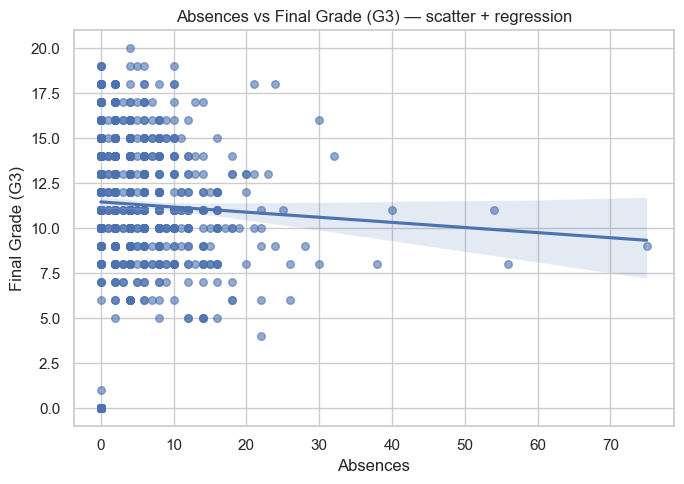

Saved: ../artifacts/figures\scatter_absences_vs_G3.png
Pearson r = -0.046, p-value = 1.403e-01
Interpretation: negative very weak correlation between absences and G3 (r=-0.05).


In [25]:
# Scatter absences vs G3 with regression + stats
if ("absences" in clean_df.columns) and ("G3" in clean_df.columns):
    x = clean_df["absences"].fillna(0)
    y = clean_df["G3"].fillna(0)

    plt.figure(figsize=(7,5))
    sns.regplot(x=x, y=y, scatter_kws={"alpha":0.6, "s":30})
    plt.title("Absences vs Final Grade (G3) — scatter + regression")
    plt.xlabel("Absences")
    plt.ylabel("Final Grade (G3)")
    plt.tight_layout()
    p = os.path.join(fig_dir, "scatter_absences_vs_G3.png")
    plt.savefig(p, dpi=150)
    plt.show()
    print("Saved:", p)

    # stats
    r, pval = stats.pearsonr(x, y)
    print(f"Pearson r = {r:.3f}, p-value = {pval:.3e}")

    # short interpretation
    if abs(r) < 0.2:
        strength = "very weak"
    elif abs(r) < 0.4:
        strength = "weak"
    elif abs(r) < 0.6:
        strength = "moderate"
    else:
        strength = "strong"

    direction = "negative" if r < 0 else "positive"
    print(f"Interpretation: {direction} {strength} correlation between absences and G3 (r={r:.2f}).")
else:
    print("Required columns 'absences' and/or 'G3' not found.")


### Interpretation – Scatterplot
- There is a weak negative trend: as absences increase, the final grade (G3) tends to decrease.  
- However, the relationship is not very strong—some students still perform well despite higher absences. This suggests absences are not the only factor influencing performance.


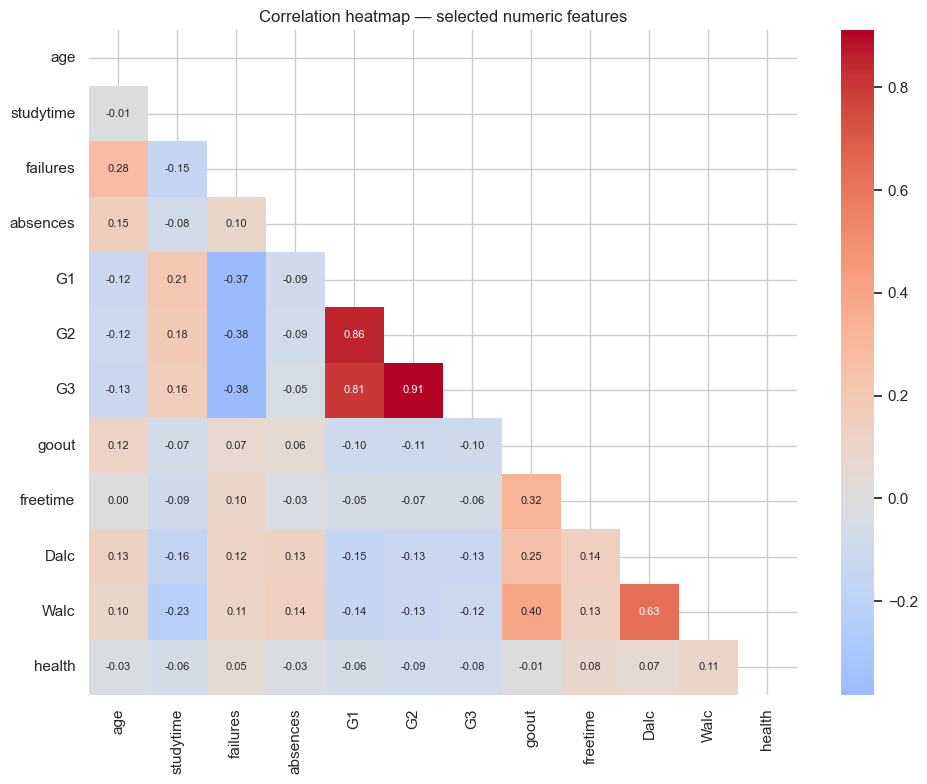

Saved: ../artifacts/figures\corr_heatmap_numeric.png


In [26]:
# Correlation heatmap (select readable numeric subset)
candidates = ["age","studytime","failures","absences","G1","G2","G3","goout","freetime","Dalc","Walc","health"]
numeric_subset = [c for c in candidates if c in clean_df.columns]

if len(numeric_subset) == 0:
    # fallback to all numeric columns (but may be large)
    numeric_subset = clean_df.select_dtypes(include=[np.number]).columns.tolist()

corr_mat = clean_df[numeric_subset].corr()

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size":8}, center=0)
plt.title("Correlation heatmap — selected numeric features")
plt.tight_layout()
p = os.path.join(fig_dir, "corr_heatmap_numeric.png")
plt.savefig(p, dpi=150)
plt.show()
print("Saved:", p)


### Interpretation – Correlation Heatmap
- Strong positive correlations: G1 and G2 are highly correlated with G3 (previous grades strongly predict the final grade).  
- Strong negative correlation: number of failures is negatively correlated with G3 (more failures → lower grades).  
- Other features show weaker correlations with G3.


In [27]:
# Index of saved figures
files = sorted([f for f in os.listdir(fig_dir) if f.lower().endswith(".png")])
print("Figures saved in", fig_dir)
for f in files:
    print("-", os.path.join(fig_dir, f))

# Short textual summary (printable)
summary = {
    "histograms": [f for f in files if f.startswith("hist_")],
    "boxplots": [f for f in files if "boxplot" in f or "violin" in f],
    "scatter": [f for f in files if "scatter" in f],
    "heatmap": [f for f in files if "corr_heatmap" in f],
}
print("\nSummary of figures:")
print(json.dumps(summary, indent=2))


Figures saved in ../artifacts/figures
- ../artifacts/figures\boxplot_G3_by_schoolsup.png
- ../artifacts/figures\boxplot_G3_by_studytime.png
- ../artifacts/figures\corr_heatmap_numeric.png
- ../artifacts/figures\hist_G1.png
- ../artifacts/figures\hist_G2.png
- ../artifacts/figures\hist_G3.png
- ../artifacts/figures\hist_absences.png
- ../artifacts/figures\hist_age.png
- ../artifacts/figures\hist_failures.png
- ../artifacts/figures\hist_studytime.png
- ../artifacts/figures\scatter_absences_vs_G3.png
- ../artifacts/figures\violin_G3_by_studytime.png

Summary of figures:
{
  "histograms": [
    "hist_G1.png",
    "hist_G2.png",
    "hist_G3.png",
    "hist_absences.png",
    "hist_age.png",
    "hist_failures.png",
    "hist_studytime.png"
  ],
  "boxplots": [
    "boxplot_G3_by_schoolsup.png",
    "boxplot_G3_by_studytime.png",
    "violin_G3_by_studytime.png"
  ],
  "scatter": [
    "scatter_absences_vs_G3.png"
  ],
  "heatmap": [
    "corr_heatmap_numeric.png"
  ]
}
